In [1556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix


In [1557]:
data = pd.read_csv(r'C:\Users\Badi\OneDrive\Bureau\A.I\heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [1558]:
#### getting some information about the dataset

In [1559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [1560]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1561]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##### checking for NaN values

In [1562]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### there is no NaN values so we can proceed.


##### here we propose to implemant a decesion tree to classify the target.

In [1563]:
data_dt = data.copy()
data_dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [1564]:
target = data_dt['target']
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [1565]:
data_dt.drop(['target'],axis = 1,inplace =True)
data_dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


<b>here we are changing the dtype of the 'trestbps','chol','thalach' and 'age' to flaot so that sklearn decesion tree
algorithm regard them as continous data no discrete(categarical)</b>

In [1566]:
data_dt = data_dt.astype({'age':'float64',
               'trestbps':'float64',
               'chol':'float64',
               'thalach':'float64',
                })
data_dt.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

<b>now we are checking for the unique values of the discrete variables(I know that they are discrete from the describtion of the data set).Subsequently,We will apply 'one label encoding' to each variable with a number of unique value >2:here,we don't want our algorithm(sklearn decision tree algorithm)to treat our categorical data like continous data because that will induce biased results and thus innacurate(from the description of the data set we know that the variables mentionned above have independant value in a sense that each value represent unique category) <\b>

In [1567]:
data_dt['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [1568]:
data_dt['fbs'].unique()

array([1, 0], dtype=int64)

In [1569]:
data_dt['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [1570]:
data_dt['exang'].unique()

array([0, 1], dtype=int64)

In [1571]:
data_dt['slope'].unique()

array([0, 2, 1], dtype=int64)

In [1572]:
data_dt['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [1573]:
data_dt['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

### applying one hot encoding

In [1574]:
data_dt_encoded= pd.get_dummies(data_dt,columns=['thal','ca','slope','restecg','cp'])
data_dt_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,thal_0,thal_1,...,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2,cp_0,cp_1,cp_2,cp_3
0,63.0,1,145.0,233.0,1,150.0,0,2.3,0,1,...,1,0,0,1,0,0,0,0,0,1
1,37.0,1,130.0,250.0,0,187.0,0,3.5,0,0,...,1,0,0,0,1,0,0,0,1,0
2,41.0,0,130.0,204.0,0,172.0,0,1.4,0,0,...,0,0,1,1,0,0,0,1,0,0
3,56.0,1,120.0,236.0,0,178.0,0,0.8,0,0,...,0,0,1,0,1,0,0,1,0,0
4,57.0,0,120.0,354.0,0,163.0,1,0.6,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,140.0,241.0,0,123.0,1,0.2,0,0,...,0,1,0,0,1,0,1,0,0,0
299,45.0,1,110.0,264.0,0,132.0,0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1
300,68.0,1,144.0,193.0,1,141.0,0,3.4,0,0,...,0,1,0,0,1,0,1,0,0,0
301,57.0,1,130.0,131.0,0,115.0,1,1.2,0,0,...,0,1,0,0,1,0,1,0,0,0


In [1575]:
data_dt_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    float64
 3   chol       303 non-null    float64
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    float64
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   thal_0     303 non-null    uint8  
 9   thal_1     303 non-null    uint8  
 10  thal_2     303 non-null    uint8  
 11  thal_3     303 non-null    uint8  
 12  ca_0       303 non-null    uint8  
 13  ca_1       303 non-null    uint8  
 14  ca_2       303 non-null    uint8  
 15  ca_3       303 non-null    uint8  
 16  ca_4       303 non-null    uint8  
 17  slope_0    303 non-null    uint8  
 18  slope_1    303 non-null    uint8  
 19  slope_2    303 non-null    uint8  
 20  restecg_0 

#### splitting our data into training and testing set

In [1576]:
x_train,x_test,y_train,y_test =train_test_split(data_dt_encoded,target,test_size = 0.25,random_state = 56)

In [1577]:
decision_tree = DecisionTreeClassifier(random_state = 91)
decision_tree = decison_tree.fit(x_train,y_train)

#### plotting the trained decision tree

[Text(687.3, 831.0600000000001, 'cp_0 <= 0.5\ngini = 0.494\nsamples = 227\nvalue = [101, 126]\nclass = +'),
 Text(386.28, 743.58, 'oldpeak <= 1.95\ngini = 0.352\nsamples = 127\nvalue = [29, 98]\nclass = +'),
 Text(285.36, 656.1, 'age <= 56.5\ngini = 0.276\nsamples = 115\nvalue = [19, 96]\nclass = +'),
 Text(167.04, 568.6200000000001, 'trestbps <= 182.0\ngini = 0.147\nsamples = 75\nvalue = [6, 69]\nclass = +'),
 Text(139.2, 481.14000000000004, 'thalach <= 142.5\ngini = 0.126\nsamples = 74\nvalue = [5, 69]\nclass = +'),
 Text(55.68, 393.66, 'oldpeak <= 0.4\ngini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = +'),
 Text(27.84, 306.18000000000006, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = +'),
 Text(83.52, 306.18000000000006, 'thalach <= 125.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = -'),
 Text(55.68, 218.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = +'),
 Text(111.36, 218.70000000000005, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = -'),
 Text(222.

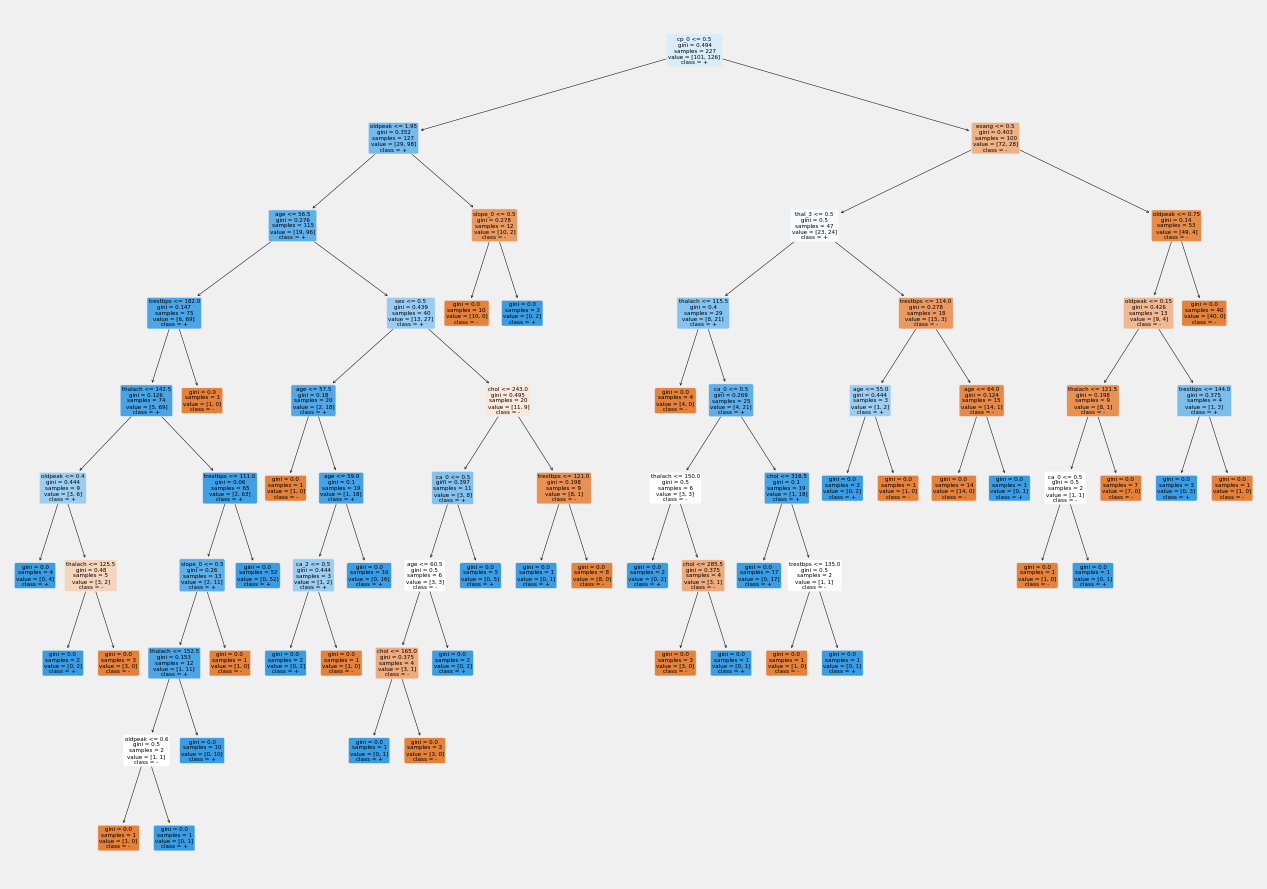

In [1578]:
plt.figure(figsize = (20,15))
plot_tree(decision_tree,filled = True,rounded = True,class_names=["-","+"],feature_names = data_dt_encoded.columns)

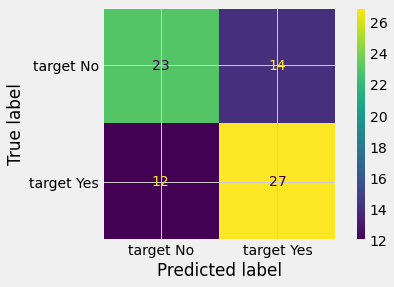

In [1579]:
plot_confusion_matrix(decision_tree,x_test,y_test,display_labels=["target No","target Yes"])

In [1580]:
pre = decision_tree.predict(x_test)
scr = metrics.classification_report(y_test.to_numpy(),pre)
print(scr)

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        37
           1       0.66      0.69      0.68        39

    accuracy                           0.66        76
   macro avg       0.66      0.66      0.66        76
weighted avg       0.66      0.66      0.66        76



<b>the accuracy of the decision tree on the testing set is relatively small <\b>

In [1581]:
pre = decision_tree.predict(x_train)
scr = metrics.classification_report(y_train.to_numpy(),pre)
print(scr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       126

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



<b>the accuracy of the decision tree on the training set is perfect(=1) </b>

<b>When this happens,we say that the decision tree has <font color = "red">overfit</font> the training data(in a sense that our model is now memorizing
   rather then predicting wich is not what we built it for</b>

<b>Some ways for dealing with this is to fix a maximum depth that the decision tree cannot exceed or to set minimum 
sample number:the decision tree algorithm will stop filtering samples below that number in a given node</b>

<b>Here,we are pruning our tree with <font color='red'>cost complexity pruning</font>.Prunning our tree with this method is all about finding the right value of the pruning parameter <i>alpha </i>(intuitively,it controls how much pruning happens). </b>

In [1582]:
#determine the values of alpha
path = decision_tree.cost_complexity_pruning_path(x_train,y_train)
print(path)
#extracting the values of alpha (in an increasing order)
ccp_alphas = path.ccp_alphas
#omitting the maximum value of alpha because it would prune all leaves and we will end up with a only a root instead of a tree
ccp_alphas = ccp_alphas[:-1]
print(ccp_alphas)

{'ccp_alphas': array([0.        , 0.00391581, 0.00403818, 0.00417343, 0.00417343,
       0.0045013 , 0.00587372, 0.00640769, 0.00660793, 0.00660793,
       0.00751217, 0.00783162, 0.00788885, 0.00804081, 0.00807636,
       0.00907147, 0.01468429, 0.01606509, 0.02143703, 0.03041037,
       0.04156129, 0.04273495, 0.11915173]), 'impurities': array([0.        , 0.00783162, 0.01590798, 0.02425484, 0.0326017 ,
       0.04160429, 0.04747801, 0.06670108, 0.07991693, 0.08652486,
       0.09403704, 0.10186866, 0.13342406, 0.14146487, 0.15761759,
       0.17576053, 0.19044482, 0.23864008, 0.26007712, 0.29048749,
       0.33204878, 0.37478372, 0.49393545])}
[0.         0.00391581 0.00403818 0.00417343 0.00417343 0.0045013
 0.00587372 0.00640769 0.00660793 0.00660793 0.00751217 0.00783162
 0.00788885 0.00804081 0.00807636 0.00907147 0.01468429 0.01606509
 0.02143703 0.03041037 0.04156129 0.04273495]


<b>creating an array that we will put decision trees into</b>

In [1583]:
decision_tree_array=[]

<b>creating a decision tree per each value of alpha and storing it in the array</b>

In [1584]:
for ccp_alpha in ccp_alphas:
    decision_tree=DecisionTreeClassifier(random_state = 0,ccp_alpha = ccp_alpha)
    decision_tree.fit(x_train,y_train)
    decision_tree_array.append(decision_tree)

In [1585]:
print(decision_tree_array)

[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.003915810083210964, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004038179148311307, random_state=0), DecisionTreeClassifier(ccp_alpha=0.00417342916763274, random_state=0), DecisionTreeClassifier(ccp_alpha=0.00417342916763274, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004501298994691058, random_state=0), DecisionTreeClassifier(ccp_alpha=0.005873715124816446, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006407689227072487, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006607929515418502, random_state=0), DecisionTreeClassifier(ccp_alpha=0.006607929515418502, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007512172501738929, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007831620166421928, random_state=0), DecisionTreeClassifier(ccp_alpha=0.00788885123686886, random_state=0), DecisionTreeClassifier(ccp_alpha=0.00804080686297241, random_state=0), DecisionTreeClassifier(ccp_

In [1586]:
#plt.style.use("fivethirtyeight")

<b>Each decision tree of the array has a unique alpha value.<br></b>
<b>We are plotting for each alpha value the accuracy of the decison tree that corresponds to that value on each of the training and testing set.</b>

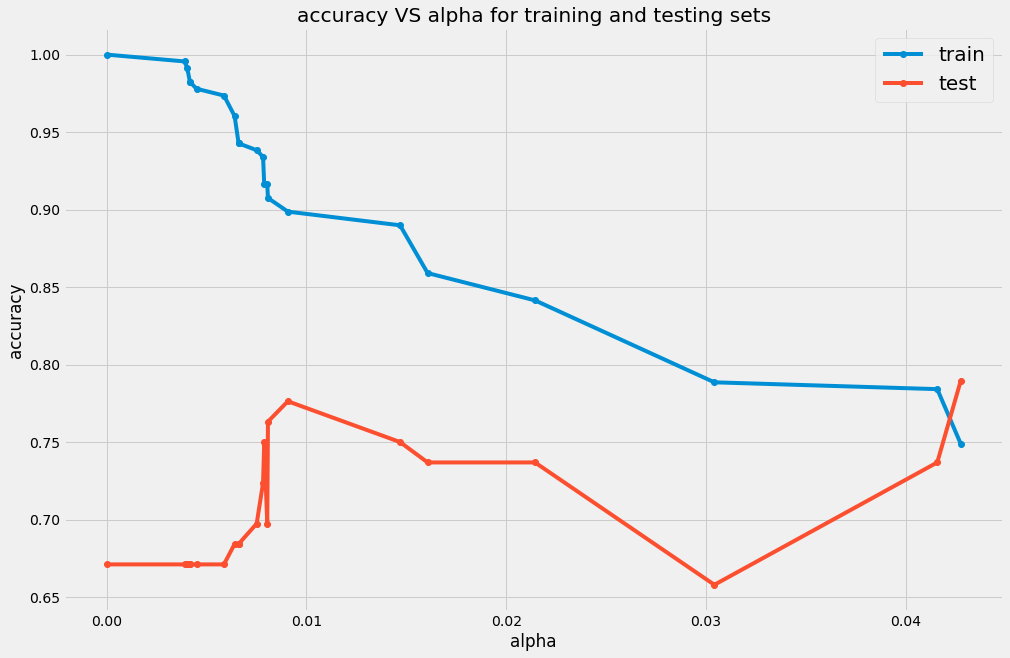

In [1587]:
train_scores = [decision_tree.score(x_train,y_train) for decision_tree in decision_tree_array]
test_scores = [decision_tree.score(x_test,y_test) for decision_tree in decision_tree_array]

fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(15,10))

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy VS alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,label ="train",marker = 'o')
ax.plot(ccp_alphas,test_scores,label ="test",marker = 'o')
ax.legend(fontsize = 20)
plt.show()

<b>Alpha is optimal in predicting the test dataset when it's approximately egal to 0.043</b>

<b>We also remark that,when the accuracy of the decision tree on the training set is almost 1,the accuracy on the testing set is very low.</b>

<b>We know that the value of alpha above is best to predict the particulary testing set but we don't know if it will be the best to predict other test sets.</b>

   tree  accuracy
0     0  0.565217
1     1  0.695652
2     2  0.608696
3     3  0.695652
4     4  0.565217
5     5  0.739130
6     6  0.652174
7     7  0.636364
8     8  0.772727
9     9  0.590909


<AxesSubplot:xlabel='tree'>

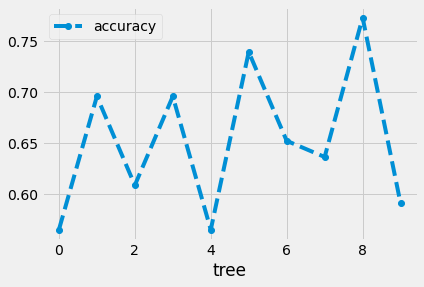

In [1588]:
#creating a decison tree with the value of alpha found above
decision_tree=DecisionTreeClassifier(random_state=42,ccp_alpha=0.043)

'''here,we are doing a 10-cross validation:for each fold,
we are testing how accurate is the decision tree (with that particular alpha
value).
'''
scores = cross_val_score(decision_tree,x_train,y_train,cv = 10)
#each different training and testing set leads to a different tree
df = pd.DataFrame(data ={'tree':range(10),'accuracy':scores})
print(df)
df.plot(x = 'tree',y = 'accuracy',marker = 'o',linestyle='--')


<b>We conclude that using the same alpha value on different training and testing sets leads to a different accuracy.</b>

<b>Using cross validation,we measure how well each alpha value do on average(in a sense we measure the mean accuracy)</b>

       alpha  mean_accuracy       std
0   0.000000       0.730830  0.081258
1   0.003916       0.735375  0.074275
2   0.004038       0.735375  0.074275
3   0.004173       0.735375  0.074275
4   0.004173       0.735375  0.074275
5   0.004501       0.739723  0.070451
6   0.005874       0.739723  0.070451
7   0.006408       0.739723  0.070451
8   0.006608       0.731028  0.067231
9   0.006608       0.731028  0.067231
10  0.007512       0.735573  0.078639
11  0.007832       0.726877  0.067338
12  0.007889       0.726877  0.067338
13  0.008041       0.731225  0.060637
14  0.008076       0.735573  0.059478
15  0.009071       0.748617  0.071844
16  0.014684       0.757510  0.090892
17  0.016065       0.775099  0.077529
18  0.021437       0.766403  0.076876
19  0.030410       0.753162  0.079517
20  0.041561       0.660870  0.070652
21  0.042735       0.652174  0.068478


<AxesSubplot:xlabel='alpha'>

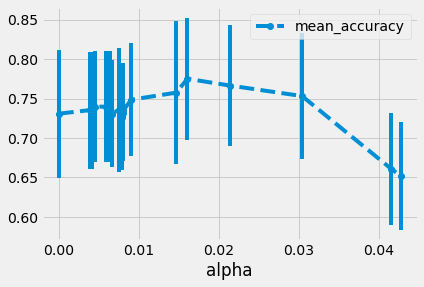

In [1589]:
#here we are creating an array to store the optimal value of alpha for each fold during cross validation
alpha_values=[]

for ccp_alpha in ccp_alphas:
    decision_tree = DecisionTreeClassifier(random_state = 0,ccp_alpha =ccp_alpha)
    scores = cross_val_score(decision_tree,x_train,y_train,cv = 10)
    #for each value of alpha we are st
    alpha_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_values,columns=['alpha','mean_accuracy','std'])
print(alpha_results)
alpha_results.plot(x ='alpha',y='mean_accuracy',yerr ='std',marker ='o',linestyle='--')

<b>Now, we extract the optimal value of alpha</b>

In [1590]:
alpha_results[(alpha_results['alpha']>0.016)
             &
             (alpha_results['alpha']<0.018)]


,alpha,mean_accuracy,std
17,0.016065,0.775099,0.077529


In [1591]:
ideal_ccp_value = alpha_results[(alpha_results['alpha']>0.016)
             &
             (alpha_results['alpha']<0.018)]['alpha']
ideal_ccp_value


17    0.016065
Name: alpha, dtype: float64

In [1592]:
ideal_ccp_value = float(ideal_ccp_value)
ideal_ccp_value

0.01606508808960448

#### Creating our final decision tree with the optimal alpha value found

In [1593]:
decision_tree_prunned = DecisionTreeClassifier(random_state = 11,ccp_alpha = ideal_ccp_value)
decision_tree_prunned = decision_tree_prunned.fit(x_train,y_train)

#### Plotting our final decision tree

[Text(626.4, 787.32, 'X[23] <= 0.5\ngini = 0.494\nsamples = 227\nvalue = [101, 126]\nclass = +'),
 Text(313.2, 612.3600000000001, 'X[7] <= 1.95\ngini = 0.352\nsamples = 127\nvalue = [29, 98]\nclass = +'),
 Text(156.6, 437.40000000000003, 'gini = 0.276\nsamples = 115\nvalue = [19, 96]\nclass = +'),
 Text(469.79999999999995, 437.40000000000003, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = -'),
 Text(939.5999999999999, 612.3600000000001, 'X[6] <= 0.5\ngini = 0.403\nsamples = 100\nvalue = [72, 28]\nclass = -'),
 Text(783.0, 437.40000000000003, 'X[11] <= 0.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]\nclass = +'),
 Text(626.4, 262.44000000000005, 'X[5] <= 115.5\ngini = 0.4\nsamples = 29\nvalue = [8, 21]\nclass = +'),
 Text(469.79999999999995, 87.48000000000002, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = -'),
 Text(783.0, 87.48000000000002, 'gini = 0.269\nsamples = 25\nvalue = [4, 21]\nclass = +'),
 Text(939.5999999999999, 262.44000000000005, 'gini = 0.278\nsamples = 18\nval

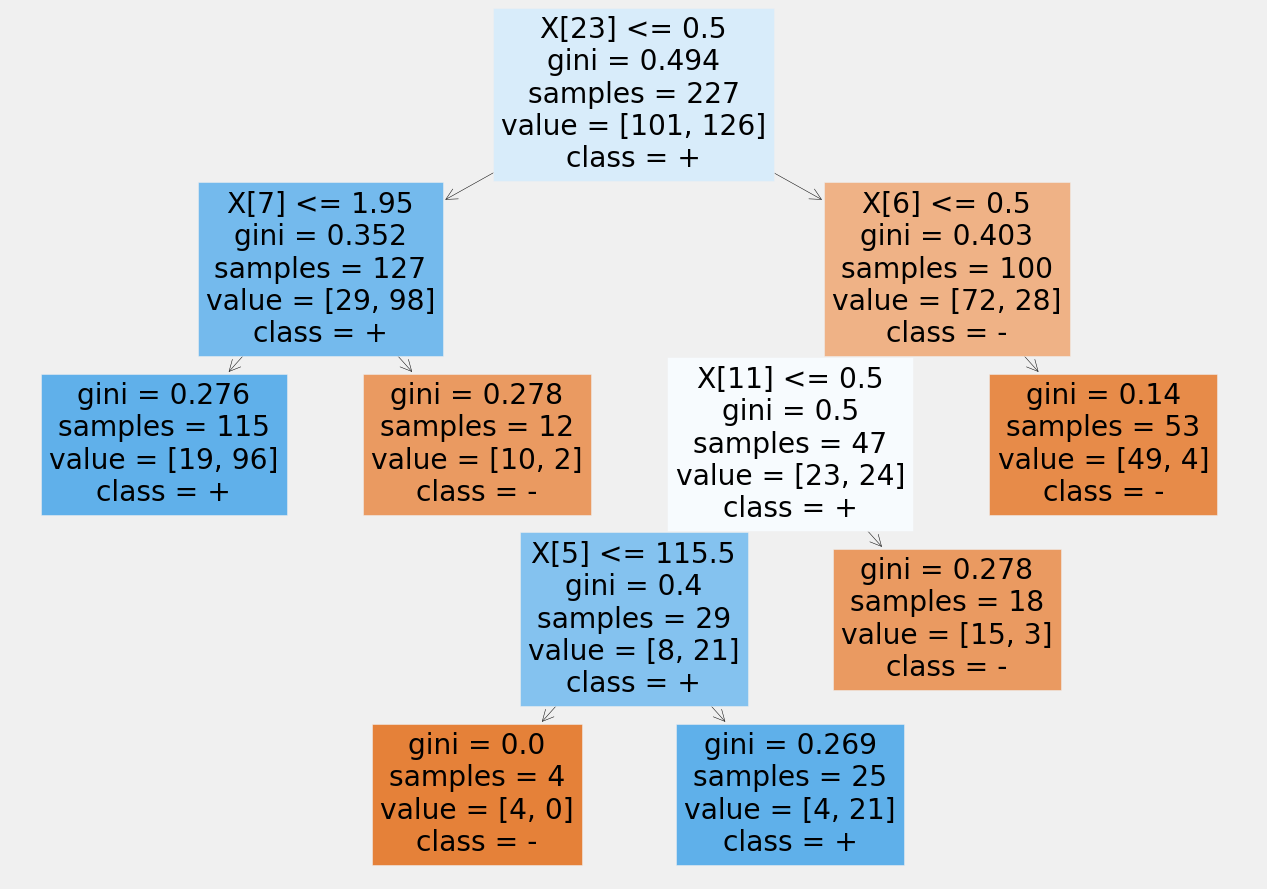

In [1594]:
plt.figure(figsize =(20,15))
plot_tree(decision_tree_prunned,filled = True,rounded = False,class_names =['-','+'])

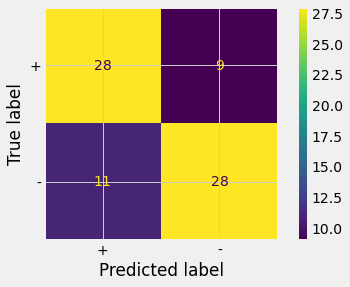

In [1595]:
plot_confusion_matrix(decision_tree_prunned,x_test,y_test,display_labels = ["+","-"])

In [1596]:
pre = decision_tree_prunned.predict(x_test)
scr = metrics.classification_report(y_test.to_numpy(),pre)
print(scr)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        37
           1       0.76      0.72      0.74        39

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



<b> comparing to the first decision treen,we remark  this is more accurate</b>

In [1597]:
data_dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45.0,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68.0,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3
301,57.0,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3


#### In hope of finding a more accurate model,we propose to use sklearn random forest classifier to predict the target

In [1598]:
x_train,x_test,y_train,y_test = train_test_split(data_dt_encoded,target,random_state = 14)

In [1599]:
#setting the n_estimators(wich corresponds on the number of tree in the forest) to 200
#(I manually checked different values of n and 200 is relatively optimal)
random_forest = RandomForestClassifier(n_estimators = 200,random_state = 13)
random_forest.fit(x_train,y_train)

pre = random_forest.predict(x_test)

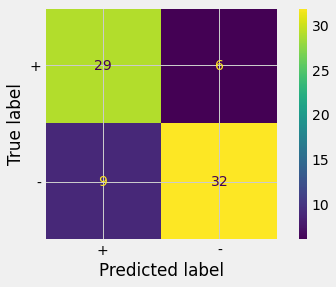

In [1600]:
plot_confusion_matrix(random_forest,x_test,y_test,display_labels = ["+","-"])

In [1601]:
scr = metrics.classification_report(y_test.to_numpy(),pre)
print(scr)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.84      0.78      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [1602]:
#### we conclude that random forest did a better job at predicting the target than the decison tree(which is obvious)

In [1603]:
### Now,we propose to use logistic regression to classify the target

In [1604]:
data_lr = data.copy()
data_lr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [1605]:
x_train,x_test,y_train,y_test = train_test_split(data_lr,target,test_size = 0.25,random_state = 11)

In [1606]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [1607]:

model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

pre = model_lr.predict(x_test)  

In [1608]:
confusion_matrix  = metrics.confusion_matrix(y_test.to_numpy(),pre)
pd.DataFrame(confusion_matrix,columns = ["predicted yes","predicted No "], index = ["actual Yes","actual No"])
   

,predicted yes,predicted No
actual Yes,31,0
actual No,0,45


In [1609]:
scr = metrics.classification_report(y_test.to_numpy(),pre)
print(scr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        45

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



### we conclude that logistic regression is better than decison tree and random forest at predicting the target and is optimal.